# MNIST 데이터 분류 - CNN

In [1]:
import tensorflow as tf
import keras
from keras import datasets
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
print(tf.__version__)
print(keras.__version__)

1.15.0
2.3.1


## 케라스 모델 만들기
아래 프로세스에 따라서 만들면 됨
1. 데이터
2. 모델 정의 (define)
3. 모델 컴파일 (compile)
4. 모델 학습 (fit)
5. 모델 평가 (evaluate)
6. 예측 (predict)

### 1. 데이터
* MNIST 데이터 준비

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# 0 ~ 1 범위로 rescale
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)

# convolutional layer 에 입력되는 데이터는
# (데이터개수) x 28 x 28 x 1 차원이어야 함
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


### 2. 모델 정의 (define)

* Convolutional neural network (CNN) 모델을 만들 때
  * 입력은 28x28x1, 출력은 10차원 원핫 인코딩
* Convolutional layer 를 층층이 쌓아가면 됨
* Convolutional layer는 Conv2D를 사용
```python
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid'
)
```
* ```filters```: 필터(커널, 채널) 개수
* ```kernel_size```: 필터의 크기
* ```strides```: 필터가 입력 데이터에서 한 번에 어느 정도 거리만큼 움직이며 convolutional 연산이 일어나는지
* ```padding```: 입력 크기 대비 출력 크기 정해줌

한편, 컨볼루션 연산 이후 출력되는 텐서는 2차원 데이터임
* 최종 출력이 10차원 원핫 인코딩이 되어야 하므로 Flatten사용
```python
tf.keras.layers.Flatten()
```
* 2차원 이상의 데이터를 1차원 벡터로 펴줌

In [4]:
from keras import models, losses, metrics, optimizers
from keras.layers import Conv2D, Activation, Dense, Flatten

In [5]:
# 모델 생성
model = models.Sequential()

In [6]:
# 필터 128개
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation(tf.nn.relu))

# 필터 256개
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation(tf.nn.relu))

# 평평하게 펴줌
model.add(Flatten())

# 출력 뉴런 10개
model.add(Dense(10))
model.add(Activation(tf.nn.softmax))

### 3. 모델 컴파일 (compile)

In [7]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=1e-4),
    metrics=['acc']
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### 4. 모델 학습 (fit)
* 학습에 시간이 매우 오래 걸릴 수 있습니다.
* 코랩 사용을 권장합니다.

In [8]:
history = model.fit(
    x=X_train, y=y_train,
    batch_size=1024,
    epochs=50,
    verbose=1,
    validation_split=.25
)


Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 8s 187us/step - loss: 1.0393 - acc: 0.7705 - val_loss: 0.3656 - val_acc: 0.8925
Epoch 2/50
45000/45000 [==============================] - 6s 124us/step - loss: 0.3343 - acc: 0.9031 - val_loss: 0.2857 - val_acc: 0.9186
Epoch 3/50
45000/45000 [==============================] - 6s 124us/step - loss: 0.2642 - acc: 0.9240 - val_loss: 0.2337 - val_acc: 0.9344
Epoch 4/50
45000/45000 [==============================] - 6s 126us/step - loss: 0.2111 - acc: 0.9390 - val_loss: 0.1912 - val_acc: 0.9463
Epoch 5/50
45000/45000 [==============================] - 6s 125us/step - loss: 0.1641 - acc: 0.9528 - val_loss: 0.1504 - val_acc: 0.9590
Epoch 6/50
45000/45000 [==============================] - 6s 126us/step - loss: 0.1280 - acc: 0.9638 - val_loss: 0.1233 - val_acc: 0.9653
Epoch 7/50
45000/45000 [==============================] - 6s 126us/step - loss: 0.1049 - acc: 0.9704 - val_loss: 0.1088 -

### 5. 모델 평가 (evaluate)

In [10]:
history.history

{'val_loss': [0.3656400856335958,
  0.2857322844028473,
  0.2337315878868103,
  0.1912376802523931,
  0.1503799854516983,
  0.12328619958559672,
  0.10877609280745189,
  0.09821975373427073,
  0.08946036616961162,
  0.084999151968956,
  0.07877575362523397,
  0.07611144251823425,
  0.07411705904006959,
  0.0723633190870285,
  0.07104093851248423,
  0.06814921126365661,
  0.06840078803698221,
  0.06599012173016866,
  0.0656093446969986,
  0.06567487705548604,
  0.0634823740084966,
  0.06506219912370045,
  0.06629279727141063,
  0.06709061388969421,
  0.06479645770390828,
  0.06702927743593852,
  0.06541068190733591,
  0.06494207461675008,
  0.06466402096748353,
  0.0670593897819519,
  0.06554012183348337,
  0.06843828015327454,
  0.06744781370162964,
  0.06796504689852396,
  0.06667758366266886,
  0.06980293939908346,
  0.0674386236667633,
  0.07050217952728272,
  0.0691032179514567,
  0.06933801489671071,
  0.06893303455511729,
  0.07409332264264425,
  0.07194749251206715,
  0.07300319

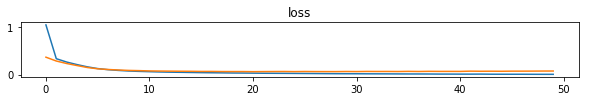

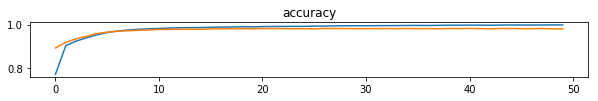

In [11]:
plt.figure(figsize=(10, 1))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('loss')
plt.show()

plt.figure(figsize=(10, 1))
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.show()

### 6. 예측 (predict)

In [12]:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

In [13]:
assert y_test.shape[0] == y_pred.shape[0]

acc = 0

for i in range(y_test.shape[0]):
    if y_test[i] == np.argmax(y_pred[i]):
        acc += 1

print(acc * 100 / y_test.shape[0], '%')

98.47 %
